In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp

### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [2]:
np.random.seed(42)
a = np.random.normal(20, 4, 100)
b = np.random.normal(20, 4, 100)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [3]:
print(np.mean(a))
print(np.mean(b))
#I do not believe there is a statistically significant difference between the samples.

19.584613930423625
20.089218348199694


### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

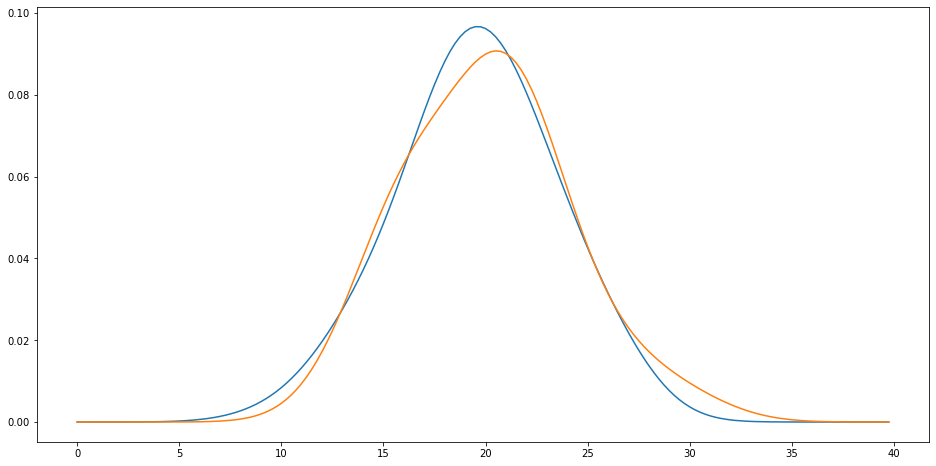

In [4]:
plt.figure(figsize=(16,8))

kde_1 = sp.gaussian_kde(a, bw_method=0.6)
kde_2 = sp.gaussian_kde(b, bw_method=0.6)

x_values = np.arange(0, 40, 0.25)
# Estimate Kernel density for the support (x-axis)
x_densities_1 = kde_1.evaluate(x_values)
x_densities_2 = kde_2.evaluate(x_values)
plt.plot(x_values, x_densities_1)
plt.plot(x_values, x_densities_2)

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Dataset a has a higher peak than dataset b. Additionally, dataset b seems to be slightly wider and to the right of a. 

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [5]:
# Write your code here 
all_data = np.concatenate([a,b])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    a_subset = all_data[:20]
    b_subset = all_data[20:]
    means_difference.append(np.mean(a_subset) - np.mean(b_subset))
    
print('P-value')
sum(means_difference >= (np.mean(a) - np.mean(b))) / len(means_difference) 

P-value


0.704

The difference is not statictically significant with a p-value of .704

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

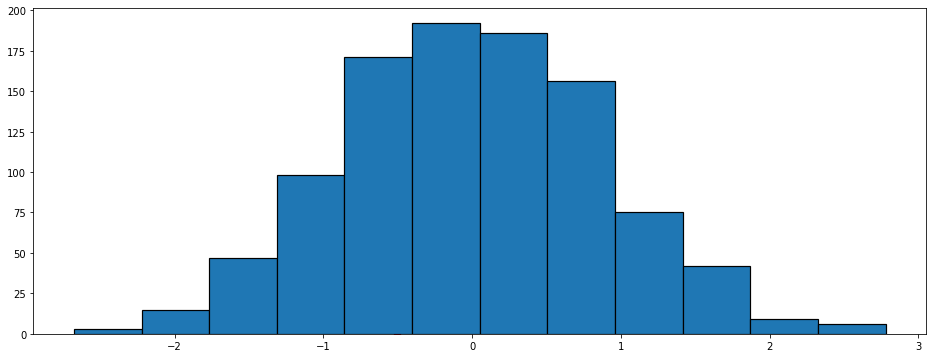

In [6]:
# Write your code here 
plt.figure(figsize=(16,6))

_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)
plt.scatter(np.mean(a) - np.mean(b), 0, color = "red", s=40)